In [ ]:
import os 
import random
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import gc
gc.collect()
import warnings
warnings.filterwarnings('ignore')

from copy import deepcopy
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import torch.optim as optim
import torch.nn.functional as F


In [ ]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


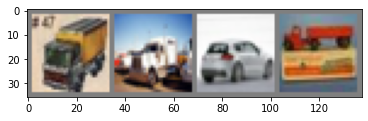

truck truck car   truck


In [ ]:
def imshow(img):
    img = img/2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg,(1,2,0)))
    plt.show()

dataiter = iter(trainloader)
images,labels = next(dataiter)

imshow(torchvision.utils.make_grid(images))
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))


In [ ]:
class TestNetWork(nn.Module):

    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3,6,5,bias = False)
        self.pool = nn.MaxPool2d(2,2)
        self.conv2 = nn.Conv2d(6,16,5,bias = False)
        self.fc1 = nn.Linear(16*5*5,120,bias = False)
        self.fc2 = nn.Linear(120,84,bias = False)
        self.fc3 = nn.Linear(84,10,bias = False)

    def forward(self,x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x,1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        return x 


net = TestNetWork()

print(net.state_dict()['conv1.weight'][0])


tensor([[[-0.0960, -0.0558, -0.0852, -0.0156, -0.0641],
         [-0.0412, -0.0426, -0.1066, -0.0624,  0.0754],
         [-0.0326,  0.1146, -0.0926, -0.0045, -0.0955],
         [ 0.0673, -0.0866,  0.0894, -0.0898,  0.0352],
         [-0.0275,  0.0031,  0.0498, -0.1130,  0.0029]],

        [[ 0.0596, -0.0629,  0.0212,  0.0904, -0.0247],
         [-0.0389,  0.1073, -0.1122,  0.0435,  0.0396],
         [ 0.0198, -0.1018,  0.0441, -0.0967, -0.0611],
         [ 0.0163, -0.1088,  0.0550,  0.1023, -0.0224],
         [-0.0205, -0.1068, -0.0817, -0.0774,  0.0658]],

        [[ 0.0829, -0.0320, -0.0561,  0.1078, -0.1090],
         [-0.0323, -0.0382, -0.0670,  0.0891, -0.0772],
         [ 0.0474, -0.0883, -0.0668, -0.0236,  0.1097],
         [ 0.0166,  0.0301,  0.0489,  0.1034, -0.0520],
         [-0.0833,  0.0852,  0.0250,  0.0462,  0.0246]]])


In [ ]:
parameters_name = []
for name, param in net.named_parameters():
    parameters_name.append(name)

print(parameters_name)



['conv1.weight', 'conv2.weight', 'fc1.weight', 'fc2.weight', 'fc3.weight']


In [ ]:


answer = []

def uniform(net,answer):

    answer.append(net.named_parameters())

    return answer



    




In [ ]:
def train(net,epochs,criterion,optimizer,trainloader):

   
    best_score = 0
    for epoch in range(epochs):

        running_loss = 0.0

        for i,data in enumerate(trainloader,0):

            input,labels = data
          
          
     

            optimizer.zero_grad()

            

            outputs = net(input)

            loss = criterion(outputs,labels)

            loss.backward()

            optimizer.step()

            

            running_loss += loss.item()
            
        

            if i % 2000 == 1999:
                print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
                
                
                running_loss = 0.0
        model_state = deepcopy(net)
        
        torch.save(model_state.state_dict(), f"{epoch}parameter.pth")
        
        score = test(net,criterion,optimizer,testloader)
        if (score>best_score):
            torch.save(model_state.state_dict(), "best_model.pth")
            best_score = score

                
    print("Finisehd traing")
    print(best_score)




def test(net,criterion,optimizer,testloader):

    correct = 0
    total = 0

    with torch.no_grad():

        for data in testloader:
            images,labels = data

            outputs = net(images)
            _,predicted = torch.max(outputs.data,1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return correct





In [ ]:

epochs = 10
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(),lr = 0.001,momentum = 0.9)




In [ ]:

train(net,epochs,criterion,optimizer,trainloader)


[1,  2000] loss: 2.040
[1,  4000] loss: 1.744
[1,  6000] loss: 1.645
[1,  8000] loss: 1.586
[1, 10000] loss: 1.523
[1, 12000] loss: 1.485
[2,  2000] loss: 1.412
[2,  4000] loss: 1.418
[2,  6000] loss: 1.384
[2,  8000] loss: 1.356
[2, 10000] loss: 1.341
[2, 12000] loss: 1.321
[3,  2000] loss: 1.247
[3,  4000] loss: 1.271
[3,  6000] loss: 1.261
[3,  8000] loss: 1.257
[3, 10000] loss: 1.230
[3, 12000] loss: 1.235
[4,  2000] loss: 1.132
[4,  4000] loss: 1.165
[4,  6000] loss: 1.165
[4,  8000] loss: 1.178
[4, 10000] loss: 1.177
[4, 12000] loss: 1.169
[5,  2000] loss: 1.085
[5,  4000] loss: 1.075
[5,  6000] loss: 1.114
[5,  8000] loss: 1.143
[5, 10000] loss: 1.116
[5, 12000] loss: 1.108
[6,  2000] loss: 1.026
[6,  4000] loss: 1.059
[6,  6000] loss: 1.070
[6,  8000] loss: 1.068
[6, 10000] loss: 1.053
[6, 12000] loss: 1.076
[7,  2000] loss: 0.980
[7,  4000] loss: 0.986
[7,  6000] loss: 1.007
[7,  8000] loss: 1.029
[7, 10000] loss: 1.051
[7, 12000] loss: 1.052
[8,  2000] loss: 0.916
[8,  4000] 

In [ ]:

model0 = TestNetWork()
model0.load_state_dict(torch.load("0parameter.pth"))


model1 = TestNetWork()
model1.load_state_dict(torch.load("1parameter.pth"))


model2 = TestNetWork()
model2.load_state_dict(torch.load("2parameter.pth"))


model3 = TestNetWork()
model3.load_state_dict(torch.load("3parameter.pth"))


model4 = TestNetWork()
model4.load_state_dict(torch.load("4parameter.pth"))


model5 = TestNetWork()
model5.load_state_dict(torch.load("5parameter.pth"))

model6 = TestNetWork()
model6.load_state_dict(torch.load("6parameter.pth"))

model7 = TestNetWork()
model7.load_state_dict(torch.load("7parameter.pth"))

model8 = TestNetWork()
model8.load_state_dict(torch.load("8parameter.pth"))

model9 = TestNetWork()
model9.load_state_dict(torch.load("9parameter.pth"))

model_list = [model0,model1,model2,model3,model4,model5,model6,model7,model8,model9]

In [ ]:
model0.state_dict()['conv1.weight']

tensor([[[[-1.7915e-02, -1.1469e-01, -2.4297e-01, -1.3265e-01,  1.8291e-02],
          [-4.8335e-02, -2.1451e-01, -3.2290e-01, -1.3415e-01,  2.2928e-01],
          [-8.3440e-02, -6.9014e-02, -2.4691e-01, -1.3873e-02,  4.9109e-02],
          [ 2.0889e-02, -1.9055e-01,  1.0023e-01,  3.4205e-02,  1.7085e-01],
          [ 3.5519e-02,  6.5938e-02,  2.2926e-01,  1.1766e-01,  2.0189e-01]],

         [[ 6.7916e-02, -1.7690e-01, -1.9349e-01, -9.7504e-02, -2.5839e-02],
          [-8.0356e-02, -7.2179e-02, -3.4841e-01, -7.0736e-02,  1.3842e-01],
          [-3.7002e-02, -2.7253e-01, -1.1798e-01, -1.3811e-01,  4.2700e-02],
          [-4.2249e-02, -2.2586e-01,  2.9355e-02,  1.7047e-01,  7.1094e-02],
          [ 7.7965e-03, -9.0482e-02,  3.8249e-02,  8.2928e-02,  2.1410e-01]],

         [[ 1.9598e-01, -5.0686e-02, -1.8729e-01, -7.9690e-03, -6.2381e-02],
          [ 3.2710e-02, -1.2763e-01, -2.3541e-01,  3.2887e-02,  5.6800e-02],
          [ 9.0734e-02, -1.8088e-01, -1.8627e-01, -3.9354e-02,  2.2031e-

In [ ]:
model0.state_dict().keys()
params = {}
for i in model0.state_dict().keys():
    params[i] = 0
print(params)
print()

for model in model_list:
    for i in model0.state_dict().keys():
        params[i] += model.state_dict()[i]

for i in model0.state_dict().keys():
    params[i] =  params[i]/10.0
print(len(params))

{'conv1.weight': 0, 'conv2.weight': 0, 'fc1.weight': 0, 'fc2.weight': 0, 'fc3.weight': 0}

5


In [ ]:
class SoupNetwork(nn.Module):

    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3,6,5)
        self.conv1.weight.data = params['conv1.weight']
        
        self.pool = nn.MaxPool2d(2,2)
        
        self.conv2 = nn.Conv2d(6,16,5)
        self.conv2.weight.data = params['conv2.weight']
        
        self.fc1 = nn.Linear(16*5*5,120)
        self.fc1.weight.data = params['fc1.weight']
        
        self.fc2 = nn.Linear(120,84)
        self.fc2.weight.data = params['fc2.weight']
        
        self.fc3 = nn.Linear(84,10)
        self.fc3.weight.data = params['fc3.weight']
    
    def forward(self,x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x,1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        return x 


In [ ]:
model_soup = SoupNetwork()

In [ ]:
soup_score - test(model_soup,criterion,optimizer,testloader)

0

In [ ]:
best_score = 5936

print(f"{best_score/10000*100}%")
print(f"{soup_score/10000*100}%")



59.36%
61.650000000000006%
